### Monthly provisional counts of deaths by age group and HHS region for select causes of death

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint
from functools import reduce
from scipy.stats import linregress
import scipy.stats as st

In [2]:
file= pd.read_csv("death_by_disease.csv")

In [3]:
death_cause= pd.DataFrame(file)
death_cause

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
death_updated=death_cause.drop(columns=['flag_allcause','flag_natcause','flag_sept','flag_neopl',
                                        'flag_diab','flag_alz','flag_inflpn','flag_clrd','flag_otherresp',
                                        'flag_nephr','flag_otherunk','flag_hd','flag_stroke','flag_cov19mcod',
                                        'flag_cov19ucod'])
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate,Note
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,4/23/2021,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,4/23/2021,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4/23/2021,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,55.0,18.0,NaN,70.0,171.0,37.0,42.0,35.0,4/23/2021,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021,NaN


In [5]:
death_updated[death_updated["Note"].str.contains("Data are provisional, and values in the most recent months are incomplete.")==False]
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate,Note
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,4/23/2021,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,4/23/2021,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4/23/2021,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,55.0,18.0,NaN,70.0,171.0,37.0,42.0,35.0,4/23/2021,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021,NaN


In [6]:
death_updated["Note"].nunique()

1

In [7]:
del death_updated['Note']
death_updated.fillna(0, inplace =True)
death_updated.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021


In [8]:
dict = {'Septicemia (A40-A41)': 'Septicemia',
        'Malignant neoplasms (C00-C97)': 'Malignant_neoplasms',
        'Diabetes mellitus (E10-E14)': 'Diabetes_mellitus',
        'Alzheimer disease (G30)': 'Alzheimer_disease',
        'Influenza and pneumonia (J09-J18)': 'Influenza_pneumonia',
        'Chronic lower respiratory diseases (J40-J47)': 'Chronic_lower_respiratory_diseases',
        'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)': 'Other_diseases_of_respiratory_system',
        'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)': 'Nephritis',
        'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)':'Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
        'Diseases of heart (I00-I09,I11,I13,I20-I51)':'Diseases_of_heart',
        'Cerebrovascular diseases (I60-I69)':'Cerebrovascular_diseases',
        'COVID-19 (U071, Multiple Cause of Death)':'COVID-19_Multiple_Cause_of_Death',
        'COVID-19 (U071, Underlying Cause of Death)':'COVID-19_Underlying_Cause_of_Death',
        'AnalysisDate':'AnalysisDate'
       }

death_updated.rename(columns=dict,
          inplace=True)

death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4/23/2021
2966,2021,3,10,55-64 years,1182.0,1100.0,0.0,357.0,38.0,0.0,0.0,55.0,18.0,0.0,70.0,171.0,37.0,42.0,35.0,4/23/2021
2967,2021,3,10,65-74 years,1984.0,1895.0,0.0,608.0,87.0,30.0,12.0,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,19.0,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021


In [9]:
US_death_total_2019=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]

In [10]:
US_death_total_2019=US_death_total_2019.loc[US_death_total_2019['Date Of Death Year'] == 2019]

In [11]:
US_death_total_2019.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021


In [12]:
US_death_total_2020=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]

In [13]:
US_death_total_2020=US_death_total_2020.loc[US_death_total_2020['Date Of Death Year'] == 2020]

In [14]:
US_death_total_2020.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
120,2020,1,United States,0-4 years,2095.0,1876.0,23.0,33.0,0.0,0.0,57.0,0.0,22.0,0.0,239.0,39.0,14.0,0.0,0.0,4/23/2021
121,2020,1,United States,15-24 years,2595.0,648.0,11.0,114.0,29.0,0.0,40.0,10.0,12.0,0.0,41.0,84.0,12.0,0.0,0.0,4/23/2021
122,2020,1,United States,25-34 years,5215.0,1906.0,32.0,323.0,81.0,0.0,119.0,31.0,21.0,25.0,100.0,329.0,65.0,0.0,0.0,4/23/2021
123,2020,1,United States,35-44 years,7584.0,4363.0,86.0,930.0,254.0,0.0,197.0,70.0,55.0,59.0,88.0,973.0,171.0,0.0,0.0,4/23/2021
124,2020,1,United States,45-54 years,14421.0,11440.0,204.0,3039.0,591.0,0.0,360.0,302.0,137.0,200.0,181.0,2738.0,496.0,0.0,0.0,4/23/2021


In [15]:
US_death_total_2021=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]
US_death_total_2021=US_death_total_2021.loc[US_death_total_2021['Date Of Death Year'] == 2021]
US_death_total_2021.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
240,2021,1,United States,0-4 years,1701.0,1554.0,17.0,31.0,0.0,0.0,0.0,0.0,18.0,0.0,307.0,17.0,10.0,10.0,0.0,4/23/2021
241,2021,1,United States,15-24 years,2915.0,954.0,0.0,101.0,22.0,0.0,0.0,11.0,12.0,0.0,369.0,76.0,11.0,122.0,99.0,4/23/2021
242,2021,1,United States,25-34 years,6425.0,3054.0,37.0,288.0,98.0,0.0,26.0,29.0,21.0,26.0,833.0,297.0,54.0,615.0,536.0,4/23/2021
243,2021,1,United States,35-44 years,9994.0,6999.0,78.0,906.0,276.0,0.0,86.0,62.0,59.0,86.0,1086.0,985.0,163.0,1556.0,1423.0,4/23/2021
244,2021,1,United States,45-54 years,19037.0,16368.0,206.0,2811.0,667.0,0.0,160.0,242.0,132.0,235.0,1091.0,2750.0,503.0,4531.0,4229.0,4/23/2021


In [16]:
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4/23/2021
2966,2021,3,10,55-64 years,1182.0,1100.0,0.0,357.0,38.0,0.0,0.0,55.0,18.0,0.0,70.0,171.0,37.0,42.0,35.0,4/23/2021
2967,2021,3,10,65-74 years,1984.0,1895.0,0.0,608.0,87.0,30.0,12.0,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,19.0,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021


In [17]:
HHS1_death_total=death_updated[death_updated["HHSRegion"].str.contains("1")==True]
HHS1_death_total = HHS1_death_total[HHS1_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS1_death_total_2=HHS1_death_total[["AgeGroup","Malignant_neoplasms", "Diseases_of_heart", "COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS1_death_ages_grouped = HHS1_death_total_2.groupby(["AgeGroup"])

HHS1_mn = HHS1_death_ages_grouped["Malignant_neoplasms"].sum()
HHS1_heart=HHS1_death_ages_grouped["Diseases_of_heart"].sum()

HHS1_death_ages_sum_multiple = HHS1_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS1_death_ages_sum_underlying = HHS1_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS1_death_ages_sum_m_and_u = HHS1_death_ages_sum_multiple + HHS1_death_ages_sum_underlying


HHS1_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS1_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS1_death_ages_sum_underlying,
                                "Number of Deaths from Malignant Neoplasms": HHS1_mn,
                                "Number of Deaths from Heart Disease": HHS1_heart,
                                "Total COVID-19 Deaths": HHS1_death_ages_sum_m_and_u
                              })
HHS1_death_total_ages_final
HHS1_death_total_df=HHS1_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS1_death_total_df

HHS1_death_total_df2 = HHS1_death_total_df.copy()
HHS1_death_total_df2.reset_index(inplace=True)
HHS1_death_total_df2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
HHS1_death_total_df2.sort_values(by='ordering', inplace=True)
HHS1_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS1_death_total_df2.set_index('index', inplace=True)
HHS1_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Number of Deaths from Malignant Neoplasms,Number of Deaths from Heart Disease,Total COVID-19 Deaths
index,,,,,,
0,0-4 years,0.0,0.0,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0,0.0,0.0
2,15-24 years,0.0,0.0,0.0,0.0,0.0
3,25-34 years,35.0,32.0,284.0,195.0,67.0
4,35-44 years,181.0,150.0,810.0,714.0,331.0
5,45-54 years,649.0,578.0,2690.0,2035.0,1227.0
6,55-64 years,2125.0,1930.0,9087.0,5679.0,4055.0
7,65-74 years,4642.0,4259.0,15661.0,9153.0,8901.0
8,75-84 years,7357.0,6677.0,15025.0,12358.0,14034.0


In [86]:
HHS2_death_total=death_updated[death_updated["HHSRegion"].str.contains("2")==True]
HHS2_death_total = HHS2_death_total[HHS2_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS2_death_total_2=HHS2_death_total[["AgeGroup","Malignant_neoplasms", "Diseases_of_heart", "COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS2_death_ages_grouped = HHS2_death_total_2.groupby(["AgeGroup"])

HHS2_mn = HHS2_death_ages_grouped["Malignant_neoplasms"].sum()
HHS2_heart=HHS2_death_ages_grouped["Diseases_of_heart"].sum()

HHS2_death_ages_sum_multiple = HHS2_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS2_death_ages_sum_underlying = HHS2_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS2_death_ages_sum_m_and_u = HHS2_death_ages_sum_multiple + HHS2_death_ages_sum_underlying


HHS2_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS2_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS2_death_ages_sum_underlying,
                                "Number of Deaths from Malignant Neoplasms": HHS2_mn,
                                "Number of Deaths from Heart Disease": HHS2_heart,
                                "Total COVID-19 Deaths": HHS2_death_ages_sum_m_and_u
                              })
HHS2_death_total_ages_final
HHS2_death_total_df=HHS2_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS2_death_total_df

HHS2_death_total_df2 = HHS2_death_total_df.copy()
HHS2_death_total_df2.reset_index(inplace=True)
HHS2_death_total_df2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
HHS2_death_total_df2.sort_values(by='ordering', inplace=True)
HHS2_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS2_death_total_df2.set_index('index', inplace=True)
HHS2_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Number of Deaths from Malignant Neoplasms,Number of Deaths from Heart Disease,Total COVID-19 Deaths
index,,,,,,
0,0-4 years,0.0,0.0,0.0,0.0,0.0
1,5-14 years,0.0,0.0,11.0,0.0,0.0
2,15-24 years,51.0,46.0,85.0,0.0,97.0
3,25-34 years,387.0,358.0,288.0,265.0,745.0
4,35-44 years,1072.0,1005.0,903.0,848.0,2077.0
5,45-54 years,3022.0,2848.0,2721.0,2475.0,5870.0
6,55-64 years,7509.0,7009.0,8555.0,6955.0,14518.0
7,65-74 years,12081.0,11318.0,13216.0,11482.0,23399.0
8,75-84 years,14767.0,13681.0,12983.0,16063.0,28448.0


In [19]:
HHS3_death_total=death_updated[death_updated["HHSRegion"].str.contains("3")==True]
HHS3_death_total = HHS3_death_total[HHS3_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS3_death_total_2=HHS3_death_total[["AgeGroup","Malignant_neoplasms", "Diseases_of_heart", "COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS3_death_ages_grouped = HHS3_death_total_2.groupby(["AgeGroup"])
HHS3_mn = HHS3_death_ages_grouped["Malignant_neoplasms"].sum()
HHS3_heart=HHS3_death_ages_grouped["Diseases_of_heart"].sum()
HHS3_death_ages_sum_multiple = HHS3_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS3_death_ages_sum_underlying = HHS3_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS3_death_ages_sum_m_and_u = HHS3_death_ages_sum_multiple + HHS3_death_ages_sum_underlying


HHS3_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS3_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS3_death_ages_sum_underlying,
                                "Number of Deaths from Malignant Neoplasms": HHS3_mn,
                                "Number of Deaths from Heart Disease": HHS3_heart,
                                "Total COVID-19 Deaths": HHS3_death_ages_sum_m_and_u
                              })
HHS3_death_total_ages_final
HHS3_death_total_df=HHS3_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS3_death_total_df

HHS3_death_total_df2 = HHS3_death_total_df.copy()
HHS3_death_total_df2.reset_index(inplace=True)
HHS3_death_total_df2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
HHS3_death_total_df2.sort_values(by='ordering', inplace=True)
HHS3_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS3_death_total_df2.set_index('index', inplace=True)
HHS3_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Number of Deaths from Malignant Neoplasms,Number of Deaths from Heart Disease,Total COVID-19 Deaths
index,,,,,,
0,0-4 years,0.0,0.0,0.0,0.0,0.0
1,5-14 years,0.0,0.0,37.0,0.0,0.0
2,15-24 years,0.0,0.0,59.0,49.0,0.0
3,25-34 years,137.0,114.0,339.0,404.0,251.0
4,35-44 years,384.0,345.0,1047.0,1126.0,729.0
5,45-54 years,1222.0,1128.0,3367.0,3193.0,2350.0
6,55-64 years,3358.0,3092.0,11351.0,8599.0,6450.0
7,65-74 years,6753.0,6273.0,17988.0,13412.0,13026.0
8,75-84 years,9607.0,8788.0,16825.0,16684.0,18395.0


In [20]:
HHS4_death_total=death_updated[death_updated["HHSRegion"].str.contains("4")==True]
HHS4_death_total = HHS4_death_total[HHS4_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS4_death_total_2=HHS4_death_total[["AgeGroup","Malignant_neoplasms", "Diseases_of_heart", "COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS4_death_ages_grouped = HHS4_death_total_2.groupby(["AgeGroup"])
HHS4_mn = HHS4_death_ages_grouped["Malignant_neoplasms"].sum()
HHS4_heart=HHS4_death_ages_grouped["Diseases_of_heart"].sum()
HHS4_death_ages_sum_multiple = HHS4_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS4_death_ages_sum_underlying = HHS4_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS4_death_ages_sum_m_and_u = HHS4_death_ages_sum_multiple + HHS4_death_ages_sum_underlying


HHS4_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS4_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS4_death_ages_sum_underlying,
                                "Number of Deaths from Malignant Neoplasms": HHS4_mn,
                                "Number of Deaths from Heart Disease": HHS4_heart,
                                "Total COVID-19 Deaths": HHS4_death_ages_sum_m_and_u
                              })

HHS4_death_total_df2 = HHS4_death_total_df.copy()
HHS4_death_total_df2.reset_index(inplace=True)
HHS4_death_total_df2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
HHS4_death_total_df2.sort_values(by='ordering', inplace=True)
HHS4_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS4_death_total_df2.set_index('index', inplace=True)
HHS4_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Number of Deaths from Malignant Neoplasms,Number of Deaths from Heart Disease,Total COVID-19 Deaths
index,,,,,,
0,0-4 years,0.0,0.0,12.0,56.0,0.0
1,5-14 years,0.0,0.0,151.0,0.0,0.0
2,15-24 years,87.0,64.0,289.0,195.0,151.0
3,25-34 years,454.0,411.0,715.0,1027.0,865.0
4,35-44 years,1220.0,1099.0,2378.0,3213.0,2319.0
5,45-54 years,3262.0,2979.0,8209.0,8840.0,6241.0
6,55-64 years,8607.0,7894.0,25881.0,21689.0,16501.0
7,65-74 years,16286.0,15074.0,40234.0,31795.0,31360.0
8,75-84 years,20498.0,18690.0,36474.0,38189.0,39188.0


In [21]:
HHS5_death_total=death_updated[death_updated["HHSRegion"].str.contains("5")==True]
HHS5_death_total = HHS5_death_total[HHS5_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS5_death_total_2=HHS5_death_total[["AgeGroup","Malignant_neoplasms", "Diseases_of_heart", "COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS5_death_ages_grouped = HHS5_death_total_2.groupby(["AgeGroup"])
HHS5_mn = HHS5_death_ages_grouped["Malignant_neoplasms"].sum()
HHS5_heart=HHS5_death_ages_grouped["Diseases_of_heart"].sum()
HHS5_death_ages_sum_multiple = HHS5_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS5_death_ages_sum_underlying = HHS5_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS5_death_ages_sum_m_and_u = HHS5_death_ages_sum_multiple + HHS5_death_ages_sum_underlying


HHS5_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS5_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS5_death_ages_sum_underlying,
                                "Number of Deaths from Malignant Neoplasms": HHS5_mn,
                                "Number of Deaths from Heart Disease": HHS5_heart,
                                "Total COVID-19 Deaths": HHS5_death_ages_sum_m_and_u
                              })

HHS5_death_total_df2 = HHS5_death_total_df.copy()
HHS5_death_total_df2.reset_index(inplace=True)
HHS5_death_total_df2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
HHS5_death_total_df2.sort_values(by='ordering', inplace=True)
HHS5_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS5_death_total_df2.set_index('index', inplace=True)
HHS5_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Number of Deaths from Malignant Neoplasms,Number of Deaths from Heart Disease,Total COVID-19 Deaths
index,,,,,,
0,0-4 years,0.0,0.0,10.0,0.0,0.0
1,5-14 years,0.0,0.0,84.0,0.0,0.0
2,15-24 years,28.0,26.0,167.0,95.0,54.0
3,25-34 years,297.0,260.0,535.0,620.0,557.0
4,35-44 years,770.0,692.0,1673.0,1919.0,1462.0
5,45-54 years,2251.0,2079.0,5826.0,5669.0,4330.0
6,55-64 years,6257.0,5744.0,19386.0,14962.0,12001.0
7,65-74 years,13171.0,12095.0,30535.0,22747.0,25266.0
8,75-84 years,18726.0,16904.0,28249.0,28349.0,35630.0


In [22]:
HHS6_death_total=death_updated[death_updated["HHSRegion"].str.contains("6")==True]
HHS6_death_total = HHS6_death_total[HHS6_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS6_death_total_2=HHS6_death_total[["AgeGroup","Malignant_neoplasms", "Diseases_of_heart", "COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS6_death_ages_grouped = HHS6_death_total_2.groupby(["AgeGroup"])
HHS6_mn = HHS6_death_ages_grouped["Malignant_neoplasms"].sum()
HHS6_heart=HHS6_death_ages_grouped["Diseases_of_heart"].sum()
HHS6_death_ages_sum_multiple = HHS6_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS6_death_ages_sum_underlying = HHS6_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS6_death_ages_sum_m_and_u = HHS6_death_ages_sum_multiple + HHS6_death_ages_sum_underlying


HHS6_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS6_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS6_death_ages_sum_underlying,
                                "Number of Deaths from Malignant Neoplasms": HHS6_mn,
                                "Number of Deaths from Heart Disease": HHS6_heart,
                                "Total COVID-19 Deaths": HHS6_death_ages_sum_m_and_u
                              })

HHS6_death_total_df2 = HHS6_death_total_df.copy()
HHS6_death_total_df2.reset_index(inplace=True)
HHS6_death_total_df2['ordering'] = [0, 2, 3, 4, 6, 1, 6, 7, 8, 9]
HHS6_death_total_df2.sort_values(by='ordering', inplace=True)
HHS6_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS6_death_total_df2.set_index('index', inplace=True)
HHS6_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Number of Deaths from Malignant Neoplasms,Number of Deaths from Heart Disease,Total COVID-19 Deaths
index,,,,,,
0,0-4 years,0.0,0.0,0.0,0.0,0.0
1,5-14 years,0.0,0.0,68.0,0.0,0.0
2,15-24 years,69.0,64.0,201.0,138.0,133.0
3,25-34 years,515.0,460.0,517.0,642.0,975.0
4,35-44 years,1357.0,1242.0,1485.0,1956.0,2599.0
6,45-54 years,3486.0,3281.0,4596.0,5198.0,6767.0
6,55-64 years,7780.0,7291.0,13934.0,12732.0,15071.0
7,65-74 years,12620.0,11837.0,21236.0,18698.0,24457.0
8,75-84 years,14113.0,13059.0,18179.0,21269.0,27172.0


In [23]:
HHS7_death_total=death_updated[death_updated["HHSRegion"].str.contains("7")==True]
HHS7_death_total = HHS7_death_total[HHS7_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS7_death_total_2=HHS7_death_total[["AgeGroup","Malignant_neoplasms", "Diseases_of_heart", "COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS7_death_ages_grouped = HHS7_death_total_2.groupby(["AgeGroup"])
HHS7_mn = HHS7_death_ages_grouped["Malignant_neoplasms"].sum()
HHS7_heart=HHS7_death_ages_grouped["Diseases_of_heart"].sum()
HHS7_death_ages_sum_multiple = HHS7_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS7_death_ages_sum_underlying = HHS7_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS7_death_ages_sum_m_and_u = HHS7_death_ages_sum_multiple + HHS7_death_ages_sum_underlying


HHS7_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS7_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS7_death_ages_sum_underlying,
                                "Number of Deaths from Malignant Neoplasms": HHS7_mn,
                                "Number of Deaths from Heart Disease": HHS7_heart,
                                "Total COVID-19 Deaths": HHS7_death_ages_sum_m_and_u
                              })

HHS7_death_total_df2 = HHS7_death_total_df.copy()
HHS7_death_total_df2.reset_index(inplace=True)
HHS7_death_total_df2['ordering'] = [0, 2, 3, 4, 7, 1, 7, 7, 8, 9]
HHS7_death_total_df2.sort_values(by='ordering', inplace=True)
HHS7_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS7_death_total_df2.set_index('index', inplace=True)
HHS7_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Number of Deaths from Malignant Neoplasms,Number of Deaths from Heart Disease,Total COVID-19 Deaths
index,,,,,,
0,0-4 years,0.0,0.0,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0,0.0,0.0
2,15-24 years,0.0,0.0,0.0,0.0,0.0
3,25-34 years,43.0,27.0,148.0,164.0,70.0
4,35-44 years,170.0,138.0,434.0,597.0,308.0
7,45-54 years,558.0,523.0,1498.0,1595.0,1081.0
7,55-64 years,1675.0,1546.0,5178.0,4292.0,3221.0
7,65-74 years,3491.0,3210.0,8404.0,6342.0,6701.0
8,75-84 years,5291.0,4828.0,7728.0,7698.0,10119.0


In [24]:
HHS8_death_total=death_updated[death_updated["HHSRegion"].str.contains("8")==True]
HHS8_death_total = HHS8_death_total[HHS8_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS8_death_total_2=HHS8_death_total[["AgeGroup","Malignant_neoplasms", "Diseases_of_heart", "COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS8_death_ages_grouped = HHS8_death_total_2.groupby(["AgeGroup"])
HHS8_mn = HHS8_death_ages_grouped["Malignant_neoplasms"].sum()
HHS8_heart=HHS8_death_ages_grouped["Diseases_of_heart"].sum()
HHS8_death_ages_sum_multiple = HHS8_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS8_death_ages_sum_underlying = HHS8_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS8_death_ages_sum_m_and_u = HHS8_death_ages_sum_multiple + HHS8_death_ages_sum_underlying


HHS8_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS8_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS8_death_ages_sum_underlying,
                                "Number of Deaths from Malignant Neoplasms": HHS8_mn,
                                "Number of Deaths from Heart Disease": HHS8_heart,
                                "Total COVID-19 Deaths": HHS8_death_ages_sum_m_and_u
                              })

HHS8_death_total_df2 = HHS8_death_total_df.copy()
HHS8_death_total_df2.reset_index(inplace=True)
HHS8_death_total_df2['ordering'] = [0, 2, 3, 4, 8, 1, 8, 8, 8, 9]
HHS8_death_total_df2.sort_values(by='ordering', inplace=True)
HHS8_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS8_death_total_df2.set_index('index', inplace=True)
HHS8_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Number of Deaths from Malignant Neoplasms,Number of Deaths from Heart Disease,Total COVID-19 Deaths
index,,,,,,
0,0-4 years,0.0,0.0,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0,0.0,0.0
2,15-24 years,0.0,0.0,0.0,0.0,0.0
3,25-34 years,51.0,48.0,104.0,95.0,99.0
4,35-44 years,167.0,133.0,356.0,343.0,300.0
8,45-54 years,481.0,414.0,919.0,890.0,895.0
8,55-64 years,1109.0,998.0,3069.0,2319.0,2107.0
8,65-74 years,2305.0,2098.0,5124.0,3639.0,4403.0
8,75-84 years,3255.0,2923.0,4954.0,4572.0,6178.0


In [25]:
HHS9_death_total=death_updated[death_updated["HHSRegion"].str.contains("9")==True]
HHS9_death_total = HHS9_death_total[HHS9_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS9_death_total_2=HHS9_death_total[["AgeGroup","Malignant_neoplasms", "Diseases_of_heart", "COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS9_death_ages_grouped = HHS9_death_total_2.groupby(["AgeGroup"])
HHS9_mn = HHS9_death_ages_grouped["Malignant_neoplasms"].sum()
HHS9_heart=HHS9_death_ages_grouped["Diseases_of_heart"].sum()
HHS9_death_ages_sum_multiple = HHS9_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS9_death_ages_sum_underlying = HHS9_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS9_death_ages_sum_m_and_u = HHS9_death_ages_sum_multiple + HHS9_death_ages_sum_underlying


HHS9_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS9_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS9_death_ages_sum_underlying,
                                "Number of Deaths from Malignant Neoplasms": HHS9_mn,
                                "Number of Deaths from Heart Disease": HHS9_heart,
                                "Total COVID-19 Deaths": HHS9_death_ages_sum_m_and_u
                              })

HHS9_death_total_df2 = HHS9_death_total_df.copy()
HHS9_death_total_df2.reset_index(inplace=True)
HHS9_death_total_df2['ordering'] = [0, 2, 3, 4, 9, 1, 9, 9, 9, 9]
HHS9_death_total_df2.sort_values(by='ordering', inplace=True)
HHS9_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS9_death_total_df2.set_index('index', inplace=True)
HHS9_death_total_df2

,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Number of Deaths from Malignant Neoplasms,Number of Deaths from Heart Disease,Total COVID-19 Deaths
index,,,,,,
0,0-4 years,0.0,0.0,10.0,0.0,0.0
1,5-14 years,0.0,0.0,101.0,0.0,0.0
2,15-24 years,109.0,74.0,219.0,46.0,183.0
3,25-34 years,502.0,441.0,618.0,486.0,943.0
4,35-44 years,1293.0,1200.0,1681.0,1418.0,2493.0
9,45-54 years,3207.0,3041.0,4706.0,4099.0,6248.0
9,55-64 years,6846.0,6488.0,13581.0,11027.0,13334.0
9,65-74 years,10347.0,9814.0,22673.0,17245.0,20161.0
9,75-84 years,11883.0,11063.0,22054.0,21785.0,22946.0


In [26]:
HHS10_death_total=death_updated[death_updated["HHSRegion"].str.contains("10")==True]
HHS10_death_total = HHS10_death_total[HHS10_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS10_death_total_2=HHS10_death_total[["AgeGroup","Malignant_neoplasms", "Diseases_of_heart", "COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS10_death_ages_grouped = HHS10_death_total_2.groupby(["AgeGroup"])
HHS10_mn = HHS10_death_ages_grouped["Malignant_neoplasms"].sum()
HHS10_heart=HHS10_death_ages_grouped["Diseases_of_heart"].sum()
HHS10_death_ages_sum_multiple = HHS10_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS10_death_ages_sum_underlying = HHS10_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS10_death_ages_sum_m_and_u = HHS10_death_ages_sum_multiple + HHS10_death_ages_sum_underlying


HHS10_death_total_df = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS10_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS10_death_ages_sum_underlying,
                                "Number of Deaths from Malignant Neoplasms": HHS10_mn,
                                "Number of Deaths from Heart Disease": HHS10_heart,
                                "Total COVID-19 Deaths": HHS10_death_ages_sum_m_and_u
                              })

HHS10_death_total_df2 = HHS10_death_total_df.copy()
HHS10_death_total_df2.reset_index(inplace=True)
HHS10_death_total_df2['ordering'] = [0, 2, 3, 4, 10, 1, 10, 10, 10, 10]
HHS10_death_total_df2.sort_values(by='ordering', inplace=True)
HHS10_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS10_death_total_df2.set_index('index', inplace=True)


,AgeGroup,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death),Number of Deaths from Malignant Neoplasms,Number of Deaths from Heart Disease,Total COVID-19 Deaths
index,,,,,,
0,0-4 years,0.0,0.0,0.0,0.0,0.0
1,5-14 years,0.0,0.0,0.0,0.0,0.0
2,15-24 years,0.0,0.0,0.0,0.0,0.0
3,25-34 years,0.0,0.0,148.0,72.0,0.0
4,35-44 years,80.0,62.0,413.0,366.0,142.0
10,45-54 years,242.0,216.0,1292.0,954.0,458.0
10,55-64 years,692.0,623.0,4160.0,2644.0,1315.0
10,65-74 years,1410.0,1264.0,7590.0,4484.0,2674.0
10,75-84 years,2017.0,1792.0,7049.0,5877.0,3809.0


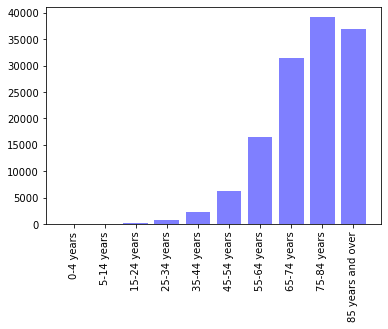

In [27]:
x_axis = np.arange(len(HHS4_death_total_df2))
y_axis=HHS4_death_total_df2["Total COVID-19 Deaths"]
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["0-4 years", "5-14 years","15-24 years", "25-34 years", "35-44 years", "45-54 years","55-64 years","65-74 years","75-84 years","85 years and over"], rotation="vertical")
plt.show()


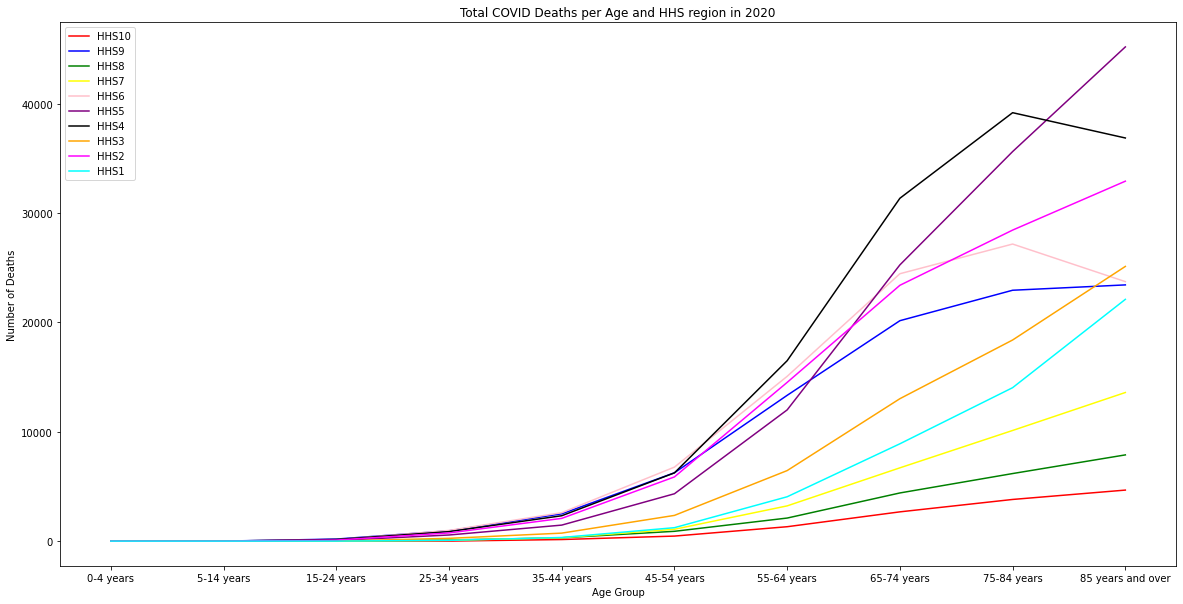

In [87]:
xvalue=HHS10_death_total_df2["AgeGroup"]
ten, = plt.plot(xvalue, HHS10_death_total_df2["Total COVID-19 Deaths"], color="red", label="HHS10")
nine, = plt.plot(xvalue, HHS9_death_total_df2["Total COVID-19 Deaths"], color="blue", label="HHS9")
eight, = plt.plot(xvalue, HHS8_death_total_df2["Total COVID-19 Deaths"], color="green", label="HHS8")
seven, = plt.plot(xvalue, HHS7_death_total_df2["Total COVID-19 Deaths"], color="yellow", label="HHS7")
six, = plt.plot(xvalue, HHS6_death_total_df2["Total COVID-19 Deaths"], color="pink", label="HHS6")
five, = plt.plot(xvalue, HHS5_death_total_df2["Total COVID-19 Deaths"], color="purple", label="HHS5")
four, = plt.plot(xvalue, HHS4_death_total_df2["Total COVID-19 Deaths"], color="black", label="HHS4")
three, = plt.plot(xvalue, HHS3_death_total_df2["Total COVID-19 Deaths"], color="orange", label="HHS3")
two, = plt.plot(xvalue, HHS2_death_total_df2["Total COVID-19 Deaths"], color="magenta", label="HHS2")
one, = plt.plot(xvalue, HHS1_death_total_df2["Total COVID-19 Deaths"], color="cyan", label="HHS1")
plt.legend(handles=[ten,nine,eight,seven,six,five,four,three,two,one], loc="best")
plt.title("Total COVID Deaths per Age and HHS region in 2020")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths")
plt.savefig("../HHSgraph.png")

In [29]:
death_2019=US_death_total_2019[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_2019_totals=death_2019.sum()
death_analysis_2019_df = pd.DataFrame({"Disease Death Count": death_2019_totals})
death_analysis_2019_df =death_analysis_2019_df .sort_values('Disease Death Count',ascending=False)
death_analysis_2019_df 

,Disease Death Count
Diseases_of_heart,660877.0
Malignant_neoplasms,600488.0
Chronic_lower_respiratory_diseases,157044.0
Cerebrovascular_diseases,150206.0
Alzheimer_disease,121486.0
Diabetes_mellitus,87777.0
Nephritis,51489.0
Influenza_pneumonia,49864.0
Other_diseases_of_respiratory_system,44095.0
Septicemia,38404.0


In [30]:
death_2020=US_death_total_2020[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_2020_totals=death_2020.sum()
death_analysis_2020_df = pd.DataFrame({"Disease Death Count": death_2020_totals})
death_analysis_2020_df =death_analysis_2020_df .sort_values('Disease Death Count',ascending=False)
death_analysis_2020_df 

,Disease Death Count
Diseases_of_heart,695277.0
Malignant_neoplasms,601188.0
COVID-19_Multiple_Cause_of_Death,382576.0
COVID-19_Underlying_Cause_of_Death,349375.0
Cerebrovascular_diseases,159738.0
Chronic_lower_respiratory_diseases,152160.0
Alzheimer_disease,133685.0
Diabetes_mellitus,101687.0
Influenza_pneumonia,53630.0
Nephritis,52336.0


In [31]:
death_2021=US_death_total_2021[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_2021_totals=death_2021.sum()
death_analysis_2021_df = pd.DataFrame({"Disease Death Count": death_2021_totals})
death_analysis_2021_df =death_analysis_2021_df .sort_values('Disease Death Count',ascending=False)
death_analysis_2021_df 

,Disease Death Count
COVID-19_Multiple_Cause_of_Death,165208.0
Diseases_of_heart,161577.0
COVID-19_Underlying_Cause_of_Death,148555.0
Malignant_neoplasms,138006.0
Cerebrovascular_diseases,38901.0
Chronic_lower_respiratory_diseases,32368.0
Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,31872.0
Alzheimer_disease,30495.0
Diabetes_mellitus,24384.0
Nephritis,13053.0


In [32]:
HHS1_death_total_2020=HHS1_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS1_totals=HHS1_death_total_2020.sum()
death_analysis_HHS1_df = pd.DataFrame({"Disease Death Count for HHS1 in 2020": death_HHS1_totals})
death_analysis_HHS1_df =death_analysis_HHS1_df.sort_values('Disease Death Count for HHS1 in 2020',ascending=False)
death_analysis_HHS1_df

,Disease Death Count for HHS1 in 2020
Malignant_neoplasms,53824.0
Diseases_of_heart,51924.0
COVID-19_Multiple_Cause_of_Death,26616.0
COVID-19_Underlying_Cause_of_Death,24113.0
Cerebrovascular_diseases,11740.0
Chronic_lower_respiratory_diseases,11628.0
Alzheimer_disease,11166.0
Diabetes_mellitus,7589.0
Influenza_pneumonia,3642.0
Other_diseases_of_respiratory_system,3499.0


In [33]:
HHS2_death_total_2020=HHS2_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS2_totals=HHS2_death_total_2020.sum()
death_analysis_HHS2_df = pd.DataFrame({"Disease Death Count for HHS2 in 2020": death_HHS2_totals})
death_analysis_HHS2_df =death_analysis_HHS2_df.sort_values('Disease Death Count for HHS2 in 2020',ascending=False)


In [34]:
HHS3_death_total_2020=HHS3_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS3_totals=HHS3_death_total_2020.sum()
death_analysis_HHS3_df = pd.DataFrame({"Disease Death Count for HHS3 in 2020": death_HHS3_totals})
death_analysis_HHS3_df =death_analysis_HHS3_df.sort_values('Disease Death Count for HHS3 in 2020',ascending=False)


In [35]:
HHS4_death_total_2020=HHS4_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS4_totals=HHS4_death_total_2020.sum()
death_analysis_HHS4_df = pd.DataFrame({"Disease Death Count for HHS4 in 2020": death_HHS4_totals})
death_analysis_HHS4_df =death_analysis_HHS4_df.sort_values('Disease Death Count for HHS4 in 2020',ascending=False)


In [36]:
HHS5_death_total_2020=HHS5_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS5_totals=HHS5_death_total_2020.sum()
death_analysis_HHS5_df = pd.DataFrame({"Disease Death Count for HHS5 in 2020": death_HHS5_totals})
death_analysis_HHS5_df =death_analysis_HHS5_df.sort_values('Disease Death Count for HHS5 in 2020',ascending=False)


In [37]:
HHS6_death_total_2020=HHS6_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS6_totals=HHS6_death_total_2020.sum()
death_analysis_HHS6_df = pd.DataFrame({"Disease Death Count for HHS6 in 2020": death_HHS6_totals})
death_analysis_HHS6_df =death_analysis_HHS6_df.sort_values('Disease Death Count for HHS6 in 2020',ascending=False)


In [38]:
HHS7_death_total_2020=HHS7_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS7_totals=HHS7_death_total_2020.sum()
death_analysis_HHS7_df = pd.DataFrame({"Disease Death Count for HHS7 in 2020": death_HHS7_totals})
death_analysis_HHS7_df =death_analysis_HHS7_df.sort_values('Disease Death Count for HHS7 in 2020',ascending=False)

In [39]:
HHS8_death_total_2020=HHS8_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS8_totals=HHS8_death_total_2020.sum()
death_analysis_HHS8_df = pd.DataFrame({"Disease Death Count for HHS8 in 2020": death_HHS8_totals})
death_analysis_HHS8_df =death_analysis_HHS8_df.sort_values('Disease Death Count for HHS8 in 2020',ascending=False)

In [40]:
HHS9_death_total_2020=HHS9_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS9_totals=HHS9_death_total_2020.sum()
death_analysis_HHS9_df = pd.DataFrame({"Disease Death Count for HHS9 in 2020": death_HHS9_totals})
death_analysis_HHS9_df =death_analysis_HHS9_df.sort_values('Disease Death Count for HHS9 in 2020',ascending=False)

In [41]:
HHS10_death_total_2020=HHS10_death_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
death_HHS10_totals=HHS10_death_total_2020.sum()
death_analysis_HHS10_df = pd.DataFrame({"Disease Death Count for HHS10 in 2020": death_HHS10_totals})
death_analysis_HHS10_df =death_analysis_HHS10_df.sort_values('Disease Death Count for HHS10 in 2020',ascending=False)

In [42]:
HHS_regions_deaths = pd.DataFrame({
                                "HHS1": death_HHS1_totals, 
                                "HHS2": death_HHS2_totals,
                                "HHS3": death_HHS3_totals,
                                "HHS4": death_HHS4_totals,
                                "HHS5": death_HHS5_totals,
                                "HHS6": death_HHS6_totals,
                                "HHS7": death_HHS7_totals,
                                "HHS8": death_HHS8_totals,
                                "HHS9": death_HHS9_totals,
                                "HHS10": death_HHS10_totals
                              })

HHS_regions_deaths

,HHS1,HHS2,HHS3,HHS4,HHS5,HHS6,HHS7,HHS8,HHS9,HHS10
Septicemia,2621.0,3803.0,4629.0,10160.0,7028.0,5644.0,1757.0,919.0,2386.0,959.0
Malignant_neoplasms,53824.0,48156.0,61961.0,134632.0,104460.0,69918.0,28406.0,17972.0,80809.0,24952.0
Diabetes_mellitus,7589.0,7736.0,10031.0,22624.0,16685.0,13420.0,4420.0,2908.0,15424.0,3963.0
Alzheimer_disease,11166.0,6421.0,9870.0,29326.0,23473.0,18691.0,6071.0,4753.0,23538.0,6530.0
Influenza_pneumonia,3642.0,6266.0,5052.0,11689.0,8439.0,5883.0,2431.0,1088.0,7795.0,1279.0
Chronic_lower_respiratory_diseases,11628.0,9402.0,13694.0,37868.0,27301.0,19124.0,8194.0,5205.0,18540.0,5618.0
Other_diseases_of_respiratory_system,3499.0,4895.0,4391.0,10700.0,7085.0,5061.0,2579.0,1261.0,4271.0,1438.0
Nephritis,3129.0,4187.0,6035.0,12049.0,9433.0,7003.0,2848.0,1118.0,5625.0,890.0
Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,2649.0,4564.0,4233.0,10625.0,6074.0,3391.0,1552.0,514.0,4307.0,1350.0
Diseases_of_heart,51924.0,67563.0,69741.0,154221.0,120215.0,87096.0,33243.0,19355.0,90987.0,23414.0


In [43]:
HHS1_death_2019=death_updated[death_updated["HHSRegion"].str.contains("1")==True]
HHS1_death_2019_total = HHS1_death_2019[HHS1_death_2019["Date Of Death Year"].astype('str').str.contains('2019')]
HHS1_death_total_2019=HHS1_death_2019_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
df2019_HHS1_totals=HHS1_death_total_2019.sum()
death_analysis_HHS1_df2019 = pd.DataFrame({"Disease Death Count for HHS1 in 2019": df2019_HHS1_totals})
death_analysis_HHS1_df2019 =death_analysis_HHS1_df2019.sort_values('Disease Death Count for HHS1 in 2019',ascending=False)

In [44]:
HHS2_death_2019=death_updated[death_updated["HHSRegion"].str.contains("2")==True]
HHS2_death_2019_total = HHS2_death_2019[HHS2_death_2019["Date Of Death Year"].astype('str').str.contains('2019')]
HHS2_death_total_2019=HHS2_death_2019_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
df2019_HHS2_totals=HHS2_death_total_2019.sum()
death_analysis_HHS2_df2019 = pd.DataFrame({"Disease Death Count for HHS2 in 2019": df2019_HHS2_totals})
death_analysis_HHS2_df2019 =death_analysis_HHS2_df2019.sort_values('Disease Death Count for HHS2 in 2019',ascending=False)

In [45]:
HHS3_death_2019=death_updated[death_updated["HHSRegion"].str.contains("3")==True]
HHS3_death_2019_total = HHS3_death_2019[HHS3_death_2019["Date Of Death Year"].astype('str').str.contains('2019')]
HHS3_death_total_2019=HHS3_death_2019_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
df2019_HHS3_totals=HHS3_death_total_2019.sum()
death_analysis_HHS3_df2019 = pd.DataFrame({"Disease Death Count for HHS3 in 2019": df2019_HHS3_totals})
death_analysis_HHS3_df2019 =death_analysis_HHS3_df2019.sort_values('Disease Death Count for HHS3 in 2019',ascending=False)

In [46]:
HHS4_death_2019=death_updated[death_updated["HHSRegion"].str.contains("4")==True]
HHS4_death_2019_total = HHS4_death_2019[HHS4_death_2019["Date Of Death Year"].astype('str').str.contains('2019')]
HHS4_death_total_2019=HHS4_death_2019_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
df2019_HHS4_totals=HHS4_death_total_2019.sum()
death_analysis_HHS4_df2019 = pd.DataFrame({"Disease Death Count for HHS4 in 2019": df2019_HHS4_totals})
death_analysis_HHS4_df2019 =death_analysis_HHS4_df2019.sort_values('Disease Death Count for HHS4 in 2019',ascending=False)

In [47]:
HHS5_death_2019=death_updated[death_updated["HHSRegion"].str.contains("5")==True]
HHS5_death_2019_total = HHS5_death_2019[HHS5_death_2019["Date Of Death Year"].astype('str').str.contains('2019')]
HHS5_death_total_2019=HHS5_death_2019_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
df2019_HHS5_totals=HHS5_death_total_2019.sum()
death_analysis_HHS5_df2019 = pd.DataFrame({"Disease Death Count for HHS5 in 2019": df2019_HHS5_totals})
death_analysis_HHS5_df2019 =death_analysis_HHS5_df2019.sort_values('Disease Death Count for HHS5 in 2019',ascending=False)

In [48]:
HHS6_death_2019=death_updated[death_updated["HHSRegion"].str.contains("6")==True]
HHS6_death_2019_total = HHS6_death_2019[HHS6_death_2019["Date Of Death Year"].astype('str').str.contains('2019')]
HHS6_death_total_2019=HHS6_death_2019_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
df2019_HHS6_totals=HHS6_death_total_2019.sum()
death_analysis_HHS6_df2019 = pd.DataFrame({"Disease Death Count for HHS6 in 2019": df2019_HHS6_totals})
death_analysis_HHS6_df2019 =death_analysis_HHS6_df2019.sort_values('Disease Death Count for HHS6 in 2019',ascending=False)


In [49]:
HHS7_death_2019=death_updated[death_updated["HHSRegion"].str.contains("7")==True]
HHS7_death_2019_total = HHS7_death_2019[HHS7_death_2019["Date Of Death Year"].astype('str').str.contains('2019')]
HHS7_death_total_2019=HHS7_death_2019_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
df2019_HHS7_totals=HHS7_death_total_2019.sum()
death_analysis_HHS7_df2019 = pd.DataFrame({"Disease Death Count for HHS7 in 2019": df2019_HHS7_totals})
death_analysis_HHS7_df2019 =death_analysis_HHS7_df2019.sort_values('Disease Death Count for HHS7 in 2019',ascending=False)

In [50]:
HHS8_death_2019=death_updated[death_updated["HHSRegion"].str.contains("8")==True]
HHS8_death_2019_total = HHS8_death_2019[HHS8_death_2019["Date Of Death Year"].astype('str').str.contains('2019')]
HHS8_death_total_2019=HHS8_death_2019_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
df2019_HHS8_totals=HHS8_death_total_2019.sum()
death_analysis_HHS8_df2019 = pd.DataFrame({"Disease Death Count for HHS8 in 2019": df2019_HHS8_totals})
death_analysis_HHS8_df2019 =death_analysis_HHS8_df2019.sort_values('Disease Death Count for HHS8 in 2019',ascending=False)

In [51]:
HHS9_death_2019=death_updated[death_updated["HHSRegion"].str.contains("9")==True]
HHS9_death_2019_total = HHS9_death_2019[HHS9_death_2019["Date Of Death Year"].astype('str').str.contains('2019')]
HHS9_death_total_2019=HHS9_death_2019_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
df2019_HHS9_totals=HHS9_death_total_2019.sum()
death_analysis_HHS9_df2019 = pd.DataFrame({"Disease Death Count for HHS9 in 2019": df2019_HHS9_totals})
death_analysis_HHS9_df2019 =death_analysis_HHS9_df2019.sort_values('Disease Death Count for HHS9 in 2019',ascending=False)


In [52]:
HHS10_death_2019=death_updated[death_updated["HHSRegion"].str.contains("10")==True]
HHS10_death_2019_total = HHS10_death_2019[HHS10_death_2019["Date Of Death Year"].astype('str').str.contains('2019')]
HHS10_death_total_2019=HHS10_death_2019_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
df2019_HHS10_totals=HHS10_death_total_2019.sum()
death_analysis_HHS10_df2019 = pd.DataFrame({"Disease Death Count for HHS10 in 2019": df2019_HHS10_totals})
death_analysis_HHS10_df2019 =death_analysis_HHS10_df2019.sort_values('Disease Death Count for HHS10 in 2019',ascending=False)


In [53]:
HHS_regions_deaths_2019 = pd.DataFrame({
                                "HHS1": df2019_HHS1_totals, 
                                "HHS2": df2019_HHS2_totals,
                                "HHS3": df2019_HHS3_totals,
                                "HHS4": df2019_HHS4_totals,
                                "HHS5": df2019_HHS5_totals,
                                "HHS6": df2019_HHS6_totals,
                                "HHS7": df2019_HHS7_totals,
                                "HHS8": df2019_HHS8_totals,
                                "HHS9": df2019_HHS9_totals,
                                "HHS10": df2019_HHS10_totals
                              })

HHS_regions_deaths_2019

,HHS1,HHS2,HHS3,HHS4,HHS5,HHS6,HHS7,HHS8,HHS9,HHS10
Septicemia,2584.0,3555.0,4640.0,9830.0,6718.0,5162.0,1651.0,870.0,2168.0,834.0
Malignant_neoplasms,53881.0,49053.0,61178.0,135324.0,104171.0,69405.0,28484.0,17468.0,80285.0,24822.0
Diabetes_mellitus,6864.0,6344.0,8803.0,19510.0,14418.0,11420.0,3819.0,2547.0,13177.0,3553.0
Alzheimer_disease,10702.0,6250.0,8961.0,26806.0,21155.0,16118.0,5699.0,4331.0,21051.0,6281.0
Influenza_pneumonia,3886.0,5375.0,4862.0,10356.0,7609.0,5248.0,2388.0,1249.0,7363.0,1488.0
Chronic_lower_respiratory_diseases,13059.0,9959.0,14275.0,38830.0,27904.0,19296.0,8519.0,5326.0,18756.0,6275.0
Other_diseases_of_respiratory_system,3656.0,4209.0,4505.0,10385.0,7110.0,5003.0,2441.0,1265.0,4185.0,1547.0
Nephritis,3470.0,4040.0,5942.0,12241.0,9206.0,6615.0,2692.0,1163.0,5221.0,959.0
Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,2226.0,3308.0,3774.0,8336.0,5176.0,2615.0,1397.0,516.0,2416.0,1031.0
Diseases_of_heart,51311.0,62044.0,67447.0,147189.0,114408.0,81422.0,32331.0,18646.0,85109.0,22713.0


In [54]:
HHS1_death_2021=death_updated[death_updated["HHSRegion"].str.contains("1")==True]
HHS1_death_2021_total = HHS1_death_2021[HHS1_death_2021["Date Of Death Year"].astype('str').str.contains('2021')]
HHS1_death_total_2021=HHS1_death_2021_total[['Septicemia','Malignant_neoplasms','Diabetes_mellitus','Alzheimer_disease',
                               'Influenza_pneumonia','Chronic_lower_respiratory_diseases','Other_diseases_of_respiratory_system',
                               'Nephritis','Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                               'Diseases_of_heart','Cerebrovascular_diseases','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']]
df2021_HHS1_totals=HHS1_death_total_2021.sum()
death_analysis_HHS1_df2021 = pd.DataFrame({"Disease Death Count for HHS1 in 2021": df2021_HHS1_totals})
death_analysis_HHS1_df2021 =death_analysis_HHS1_df2021.sort_values('Disease Death Count for HHS1 in 2021',ascending=False)
death_analysis_HHS1_df2021
#These are all going to be much lower numbers due to only having data through April-ish

,Disease Death Count for HHS1 in 2021
Malignant_neoplasms,13105.0
Diseases_of_heart,12291.0
COVID-19_Multiple_Cause_of_Death,8506.0
COVID-19_Underlying_Cause_of_Death,7356.0
Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,3203.0
Cerebrovascular_diseases,2865.0
Alzheimer_disease,2678.0
Chronic_lower_respiratory_diseases,2561.0
Diabetes_mellitus,1825.0
Other_diseases_of_respiratory_system,912.0


In [55]:
top3_1_2020=death_analysis_HHS1_df.nlargest(3,'Disease Death Count for HHS1 in 2020')
top3_1_2020.index.names = ['COD']
top3_1_2020

,Disease Death Count for HHS1 in 2020
COD,
Malignant_neoplasms,53824.0
Diseases_of_heart,51924.0
COVID-19_Multiple_Cause_of_Death,26616.0


In [56]:
top3_2_2020=death_analysis_HHS2_df.nlargest(3,'Disease Death Count for HHS2 in 2020')
top3_2_2020.index.names = ['COD']
top3_2_2020

,Disease Death Count for HHS2 in 2020
COD,
Diseases_of_heart,67563.0
COVID-19_Multiple_Cause_of_Death,56229.0
COVID-19_Underlying_Cause_of_Death,51848.0


In [57]:
top3_3_2020=death_analysis_HHS3_df.nlargest(3,'Disease Death Count for HHS3 in 2020')
top3_3_2020.index.names = ['COD']
top3_3_2020

,Disease Death Count for HHS3 in 2020
COD,
Diseases_of_heart,69741.0
Malignant_neoplasms,61961.0
COVID-19_Multiple_Cause_of_Death,34708.0


In [58]:
top3_4_2020=death_analysis_HHS4_df.nlargest(3,'Disease Death Count for HHS4 in 2020')
top3_4_2020.index.names = ['COD']
top3_4_2020

,Disease Death Count for HHS4 in 2020
COD,
Diseases_of_heart,154221.0
Malignant_neoplasms,134632.0
COVID-19_Multiple_Cause_of_Death,70046.0


In [59]:
top3_5_2020=death_analysis_HHS5_df.nlargest(3,'Disease Death Count for HHS5 in 2020')
top3_5_2020.index.names = ['COD']
top3_5_2020

,Disease Death Count for HHS5 in 2020
COD,
Diseases_of_heart,120215.0
Malignant_neoplasms,104460.0
COVID-19_Multiple_Cause_of_Death,65494.0


In [60]:
top3_6_2020=death_analysis_HHS6_df.nlargest(3,'Disease Death Count for HHS6 in 2020')
top3_6_2020.index.names = ['COD']
top3_6_2020

,Disease Death Count for HHS6 in 2020
COD,
Diseases_of_heart,87096.0
Malignant_neoplasms,69918.0
COVID-19_Multiple_Cause_of_Death,52454.0


In [61]:
top3_7_2020=death_analysis_HHS7_df.nlargest(3,'Disease Death Count for HHS7 in 2020')
top3_7_2020.index.names = ['COD']
top3_7_2020

,Disease Death Count for HHS7 in 2020
COD,
Diseases_of_heart,33243.0
Malignant_neoplasms,28406.0
COVID-19_Multiple_Cause_of_Death,18365.0


In [62]:
top3_8_2020=death_analysis_HHS8_df.nlargest(3,'Disease Death Count for HHS8 in 2020')
top3_8_2020.index.names = ['COD']
top3_8_2020

,Disease Death Count for HHS8 in 2020
COD,
Diseases_of_heart,19355.0
Malignant_neoplasms,17972.0
COVID-19_Multiple_Cause_of_Death,11595.0


In [63]:
top3_9_2020=death_analysis_HHS9_df.nlargest(3,'Disease Death Count for HHS9 in 2020')
top3_9_2020.index.names = ['COD']
top3_9_2020

,Disease Death Count for HHS9 in 2020
COD,
Diseases_of_heart,90987.0
Malignant_neoplasms,80809.0
COVID-19_Multiple_Cause_of_Death,46438.0


In [64]:
top3_10_2020=death_analysis_HHS10_df.nlargest(3,'Disease Death Count for HHS10 in 2020')
top3_10_2020.index.names = ['COD']
top3_10_2020

,Disease Death Count for HHS10 in 2020
COD,
Malignant_neoplasms,24952.0
Diseases_of_heart,23414.0
COVID-19_Multiple_Cause_of_Death,6934.0


In [65]:
dfs_2020 = [top3_1_2020, top3_2_2020, top3_3_2020, top3_4_2020, top3_5_2020, top3_6_2020, top3_7_2020, top3_8_2020, top3_9_2020, top3_10_2020] # list of dataframes
#i had to use a new dependency from stack overflow
df_merged_2020 = reduce(lambda  left,right: pd.merge(left,right,on=['COD'],
                                            how='outer'), dfs_2020)
df_merged_2020

,Disease Death Count for HHS1 in 2020,Disease Death Count for HHS2 in 2020,Disease Death Count for HHS3 in 2020,Disease Death Count for HHS4 in 2020,Disease Death Count for HHS5 in 2020,Disease Death Count for HHS6 in 2020,Disease Death Count for HHS7 in 2020,Disease Death Count for HHS8 in 2020,Disease Death Count for HHS9 in 2020,Disease Death Count for HHS10 in 2020
COD,,,,,,,,,,
Malignant_neoplasms,53824.0,NaN,61961.0,134632.0,104460.0,69918.0,28406.0,17972.0,80809.0,24952.0
Diseases_of_heart,51924.0,67563.0,69741.0,154221.0,120215.0,87096.0,33243.0,19355.0,90987.0,23414.0
COVID-19_Multiple_Cause_of_Death,26616.0,56229.0,34708.0,70046.0,65494.0,52454.0,18365.0,11595.0,46438.0,6934.0
COVID-19_Underlying_Cause_of_Death,NaN,51848.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
top3_1_2019=death_analysis_HHS1_df2019.nlargest(3,'Disease Death Count for HHS1 in 2019')
top3_1_2019.index.names = ['COD']

top3_2_2019=death_analysis_HHS2_df2019.nlargest(3,'Disease Death Count for HHS2 in 2019')
top3_2_2019.index.names = ['COD']

top3_3_2019=death_analysis_HHS3_df2019.nlargest(3,'Disease Death Count for HHS3 in 2019')
top3_3_2019.index.names = ['COD']

top3_4_2019=death_analysis_HHS4_df2019.nlargest(3,'Disease Death Count for HHS4 in 2019')
top3_4_2019.index.names = ['COD']

top3_5_2019=death_analysis_HHS5_df2019.nlargest(3,'Disease Death Count for HHS5 in 2019')
top3_5_2019.index.names = ['COD']

top3_6_2019=death_analysis_HHS6_df2019.nlargest(3,'Disease Death Count for HHS6 in 2019')
top3_6_2019.index.names = ['COD']

top3_7_2019=death_analysis_HHS7_df2019.nlargest(3,'Disease Death Count for HHS7 in 2019')
top3_7_2019.index.names = ['COD']

top3_8_2019=death_analysis_HHS8_df2019.nlargest(3,'Disease Death Count for HHS8 in 2019')
top3_8_2019.index.names = ['COD']

top3_9_2019=death_analysis_HHS9_df2019.nlargest(3,'Disease Death Count for HHS9 in 2019')
top3_9_2019.index.names = ['COD']

top3_10_2019=death_analysis_HHS10_df2019.nlargest(3,'Disease Death Count for HHS10 in 2019')
top3_10_2019.index.names = ['COD']

In [67]:
dfs_2019 = [top3_1_2019, top3_2_2019, top3_3_2019, top3_4_2019, top3_5_2019, top3_6_2019, top3_7_2019, top3_8_2019, top3_9_2019, top3_10_2019] # list of dataframes
df_merged_2019 = reduce(lambda  left,right: pd.merge(left,right,on=['COD'],
                                            how='outer'), dfs_2019)
df_merged_2019

,Disease Death Count for HHS1 in 2019,Disease Death Count for HHS2 in 2019,Disease Death Count for HHS3 in 2019,Disease Death Count for HHS4 in 2019,Disease Death Count for HHS5 in 2019,Disease Death Count for HHS6 in 2019,Disease Death Count for HHS7 in 2019,Disease Death Count for HHS8 in 2019,Disease Death Count for HHS9 in 2019,Disease Death Count for HHS10 in 2019
COD,,,,,,,,,,
Malignant_neoplasms,53881.0,49053.0,61178.0,135324.0,104171.0,69405.0,28484.0,17468.0,80285.0,24822.0
Diseases_of_heart,51311.0,62044.0,67447.0,147189.0,114408.0,81422.0,32331.0,18646.0,85109.0,22713.0
Chronic_lower_respiratory_diseases,13059.0,9959.0,NaN,38830.0,27904.0,19296.0,8519.0,5326.0,NaN,NaN
Cerebrovascular_diseases,NaN,NaN,15361.0,NaN,NaN,NaN,NaN,NaN,21827.0,NaN
Alzheimer_disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6281.0


In [68]:
top3merged_df = pd.merge(df_merged_2019, df_merged_2020, on="COD", how="outer")
neworder = ['Disease Death Count for HHS1 in 2019','Disease Death Count for HHS1 in 2020',
            'Disease Death Count for HHS2 in 2019','Disease Death Count for HHS2 in 2020',
            'Disease Death Count for HHS3 in 2019','Disease Death Count for HHS3 in 2020',
            'Disease Death Count for HHS4 in 2019','Disease Death Count for HHS4 in 2020',
            'Disease Death Count for HHS5 in 2019','Disease Death Count for HHS5 in 2020',
            'Disease Death Count for HHS6 in 2019','Disease Death Count for HHS6 in 2020',
            'Disease Death Count for HHS7 in 2019','Disease Death Count for HHS7 in 2020',
            'Disease Death Count for HHS8 in 2019','Disease Death Count for HHS8 in 2020',
            'Disease Death Count for HHS9 in 2019','Disease Death Count for HHS9 in 2020',
            'Disease Death Count for HHS10 in 2019','Disease Death Count for HHS10 in 2020']
top3merged_df=top3merged_df.reindex(columns=neworder)
top3merged_df.fillna(0, inplace =True)
top3merged_df = top3merged_df.rename(columns = {'Disease Death Count for HHS1 in 2019':'HHS1 2019','Disease Death Count for HHS1 in 2020':'HHS1 2020',
            'Disease Death Count for HHS2 in 2019':'HHS2 2019','Disease Death Count for HHS2 in 2020':'HHS2 2020',
            'Disease Death Count for HHS3 in 2019':'HHS3 2019','Disease Death Count for HHS3 in 2020':'HHS3 2020',
            'Disease Death Count for HHS4 in 2019':'HHS4 2019','Disease Death Count for HHS4 in 2020':'HHS4 2020',
            'Disease Death Count for HHS5 in 2019':'HHS5 2019','Disease Death Count for HHS5 in 2020':'HHS5 2020',
            'Disease Death Count for HHS6 in 2019':'HHS6 2019','Disease Death Count for HHS6 in 2020':'HHS6 2020',
            'Disease Death Count for HHS7 in 2019':'HHS7 2019','Disease Death Count for HHS7 in 2020':'HHS7 2020',
            'Disease Death Count for HHS8 in 2019':'HHS8 2019','Disease Death Count for HHS8 in 2020':'HHS8 2020',
            'Disease Death Count for HHS9 in 2019':'HHS9 2019','Disease Death Count for HHS9 in 2020':'HHS9 2020',
            'Disease Death Count for HHS10 in 2019':'HHS10 2019','Disease Death Count for HHS10 in 2020':'HHS10 2020',})
top3merged_df


,HHS1 2019,HHS1 2020,HHS2 2019,HHS2 2020,HHS3 2019,HHS3 2020,HHS4 2019,HHS4 2020,HHS5 2019,HHS5 2020,HHS6 2019,HHS6 2020,HHS7 2019,HHS7 2020,HHS8 2019,HHS8 2020,HHS9 2019,HHS9 2020,HHS10 2019,HHS10 2020
COD,,,,,,,,,,,,,,,,,,,,
Malignant_neoplasms,53881.0,53824.0,49053.0,0.0,61178.0,61961.0,135324.0,134632.0,104171.0,104460.0,69405.0,69918.0,28484.0,28406.0,17468.0,17972.0,80285.0,80809.0,24822.0,24952.0
Diseases_of_heart,51311.0,51924.0,62044.0,67563.0,67447.0,69741.0,147189.0,154221.0,114408.0,120215.0,81422.0,87096.0,32331.0,33243.0,18646.0,19355.0,85109.0,90987.0,22713.0,23414.0
Chronic_lower_respiratory_diseases,13059.0,0.0,9959.0,0.0,0.0,0.0,38830.0,0.0,27904.0,0.0,19296.0,0.0,8519.0,0.0,5326.0,0.0,0.0,0.0,0.0,0.0
Cerebrovascular_diseases,0.0,0.0,0.0,0.0,15361.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21827.0,0.0,0.0,0.0
Alzheimer_disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6281.0,0.0
COVID-19_Multiple_Cause_of_Death,0.0,26616.0,0.0,56229.0,0.0,34708.0,0.0,70046.0,0.0,65494.0,0.0,52454.0,0.0,18365.0,0.0,11595.0,0.0,46438.0,0.0,6934.0
COVID-19_Underlying_Cause_of_Death,0.0,0.0,0.0,51848.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
top3_t = top3merged_df.T
top3_t

COD,Malignant_neoplasms,Diseases_of_heart,Chronic_lower_respiratory_diseases,Cerebrovascular_diseases,Alzheimer_disease,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death
HHS1 2019,53881.0,51311.0,13059.0,0.0,0.0,0.0,0.0
HHS1 2020,53824.0,51924.0,0.0,0.0,0.0,26616.0,0.0
HHS2 2019,49053.0,62044.0,9959.0,0.0,0.0,0.0,0.0
HHS2 2020,0.0,67563.0,0.0,0.0,0.0,56229.0,51848.0
HHS3 2019,61178.0,67447.0,0.0,15361.0,0.0,0.0,0.0
HHS3 2020,61961.0,69741.0,0.0,0.0,0.0,34708.0,0.0
HHS4 2019,135324.0,147189.0,38830.0,0.0,0.0,0.0,0.0
HHS4 2020,134632.0,154221.0,0.0,0.0,0.0,70046.0,0.0
HHS5 2019,104171.0,114408.0,27904.0,0.0,0.0,0.0,0.0
HHS5 2020,104460.0,120215.0,0.0,0.0,0.0,65494.0,0.0


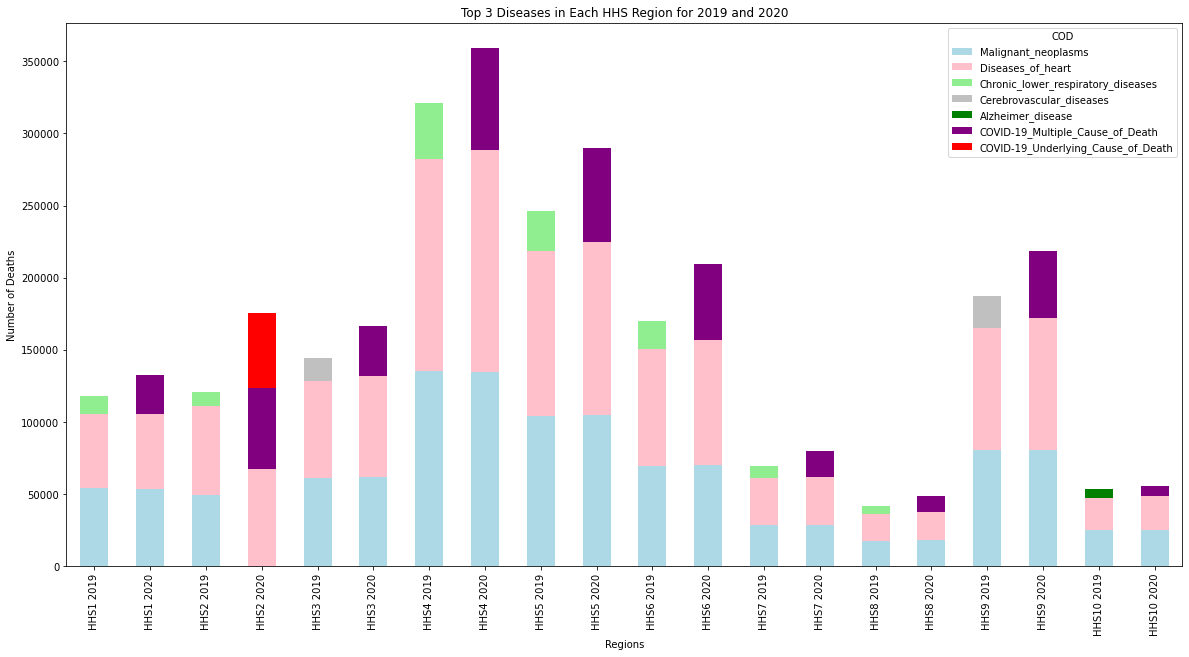

In [70]:
my_colors = list(['lightblue','pink', 'lightgreen','silver', 'g', 'purple', 'r'])
axis = top3_t[['Malignant_neoplasms', 'Diseases_of_heart','Chronic_lower_respiratory_diseases','Cerebrovascular_diseases','Alzheimer_disease','COVID-19_Multiple_Cause_of_Death','COVID-19_Underlying_Cause_of_Death']].plot(kind="bar", stacked=True, figsize=(20,10), color=my_colors)
plt.title("Top 3 Diseases in Each HHS Region for 2019 and 2020")
plt.xlabel("Regions")
plt.ylabel("Number of Deaths")
plt.savefig("../top3graph.png")

#interesting because NY was the only place covid underlying broke the top 3 (high population)

In [71]:
#HHS4_heart #number of deaths from heart disease in 2020

#pulling number from 2019 for HHS4
HHS4_death_total_2019=death_updated[death_updated["HHSRegion"].str.contains("4")==True]
HHS4_death_total_2019 = HHS4_death_total_2019[HHS4_death_total_2019["Date Of Death Year"].astype('str').str.contains('2019')]
HHS4_death_total_2019_2=HHS4_death_total_2019[["AgeGroup", "Diseases_of_heart"]]

HHS4_death_ages_grouped_2019 = HHS4_death_total_2019_2.groupby(["AgeGroup"])
HHS4_heart_2019=HHS4_death_ages_grouped_2019["Diseases_of_heart"].sum()



In [72]:
HHS4_df_202019 = pd.DataFrame({
                                "2019": HHS4_heart_2019,
                                "2020": HHS4_heart
                              })

heart_HHS4 = HHS4_df_202019.copy()
heart_HHS4.reset_index(inplace=True)
heart_HHS4['ordering'] = [0, 2, 3, 4, 9, 1, 9, 9, 9, 9]
heart_HHS4.sort_values(by='ordering', inplace=True)
heart_HHS4.rename(columns={'ordering': 'index'}, inplace=True)
heart_HHS4.set_index('index', inplace=True)
heart_HHS4

,AgeGroup,2019,2020
index,,,
0,0-4 years,73.0,56.0
1,5-14 years,0.0,0.0
2,15-24 years,226.0,195.0
3,25-34 years,935.0,1027.0
4,35-44 years,2758.0,3213.0
9,45-54 years,8262.0,8840.0
9,55-64 years,20133.0,21689.0
9,65-74 years,29720.0,31795.0
9,75-84 years,36454.0,38189.0


[0.81349232 3.55395331]


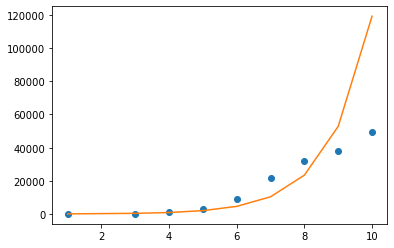

In [73]:
x_data = np.array([1,3,4,5,6,7,8,9,10])
y_data = np.array([56.0,195.0,1027.0,3213.0,8840.0,21689.0,31795.0,38189.0,49217.0])
#I had to take out the zero value because I got a divide by zero error
log_x_data = np.log(x_data)
log_y_data = np.log(y_data)
curve_fit = np.polyfit(x_data, log_y_data, 1)
print(curve_fit)
#[0.81349232 3.55395331]
y = np.exp(3.55395331) * np.exp(0.81349232*x_data)
plt.plot(x_data, y_data, "o")
plt.plot(x_data, y)

#https://www.kite.com/python/answers/how-to-do-exponential-and-logarithmic-curve-fitting-in-python

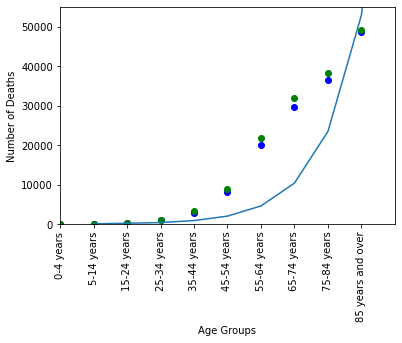

In [74]:
x_values = heart_HHS4['AgeGroup']
y_values = heart_HHS4['2019']
y_values_2 = heart_HHS4['2020']
plt.scatter(x_values,y_values,color='blue')
plt.scatter(x_values,y_values_2,color='green')
plt.plot(x_data, y)
plt.xticks(rotation = 90)
plt.xlabel('Age Groups')
plt.ylabel('Number of Deaths')
plt.xlim(0, 10)
plt.ylim(-1, 55000)
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()

#the only thing I could figure out how to do was a exponential model for 2020.... 
#I'm not sure how valuable this info is